# Estadística Bayesiana


**Ejemplo: Proporción de personas que duermen suficiente.**

Supongamos que estamos interesados en aprender sobre los hábitos de sueño de los estudiantes de un colegio. Como es bien sabido, es recomendable dormir al menos 8 horas al día. Nos interesa saber qué proporción de los estudiantes del colegio duermen al menos 8 horas.

Considere una población de estudiantes y sea $p\in(0,1)$ la proporción de estudiantes que duermen al menos 8 horas al día.

Para obtener un modelo estadístico bayesiano necesitamos dos cosas:
1. Un modelo de probabilidad para la muestra, $f(x|p)$, con $p\in\Theta$ un parámetro.
2. Una distribución inicial para $p$, $\pi(p)$.

*Obs*: La distribución inicial para $p$ refleja el conocimiento u opinión a priori sobre los posibles valores del parámetro.

El artículo de internet "College Students Don't Get Enough Sleep" en Gamecock (Universidad de Carolina del Sur), menciona que los resultados de una encuesta reportan que la mayoría de los estudiantes solo duermen 6 horas al día.
Otro artículo, "Sleep on It: Implementing a Relaxation Program into the College Corriculum" en Fresh Writing (Universidad de Notre Dame), menciona que de una muestra de 100 estudiantes, aproximadamente $70\%$ reportan haber dormido de 5 a 6 horas entre semana, el $28\%$ de 7 a 8 horas, y solo el $3\%$ 9 o más horas.

*¿Qué distribución inicial debe tener $p$?*

Además, en nuestro experimento tenemos a 27 estudiantes que fueron encuestados sobre sus horas de sueño. 11 de ellos reportan haber dormido al menos 8 horas la noche previa.

*¿Cuál es el modelo de probabilidad de la muestra $x_1,\ldots, x_{27}$?*

Podemos pensar en cada $x_i$ como un ensayo Bernoulli,
$$
X_i = \begin{cases}
        1 &\text{si la i-ésima persona durmió al menos 8 horas}\\
        0 &\text{c.o.c}
       \end{cases}
$$
Luego, el total de personas que durmieron (o no) al menos 8 horas es $\sum X_i$, que sigue una distribución $\mathcal{Bin}(27, p)$.
La función de verosimilitud es
$$
f(x_1,\ldots,x_{27}|p) \propto p^{s}(1-p)^{27-s} = p^{s}(1-p)^{f}
$$
con $s$ la cantidad de éxitos de los ensayos bernoulli (i.e, el valor de la suma) y $f$ la cantidad de fracasos.

La distribución posterior, $f(p|x_1,\ldots,x_{27})$ es proporcional a
$$
f(x_1,\ldots,x_{27}|p) \pi(p)
$$

**¿Qué distribución inicial usamos para $p$?**

*Inicial discreta*

Algo sencillo es dar una lista de posibles valores para $p$ y asignarles cierto peso.
Por ejemplo,

$$
(0.05,0.15,0.25,\ldots,0.85,0.95)
$$

Usando la información de las encuestas podemos decir que lo más pausible es que el valor de $p$ esté alrededor de $0.3$. Luego, podemos dar los siguientes pesos

$$
(1, 5.2, 8, 7.2, 4.6, 2.1, 0.7, 0.1, 0, 0)
$$

Al normalizar estos pesos obtenemos probabilidades.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.special import betainc
from scipy.optimize import fsolve


np.set_printoptions(precision=2)

In [ ]:
# Espacio parametral
p = np.linspace(0.05, 0.95, 10)

In [ ]:
p

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [ ]:
prior = np.array([1, 5.2, 8, 7.2, 4.6, 2.1, 0.7, 0.1, 0, 0])
prior /= np.sum(prior)

In [ ]:
# Distribución inicial sobre el espacio parametral
prior

array([0.03, 0.18, 0.28, 0.25, 0.16, 0.07, 0.02, 0.  , 0.  , 0.  ])

In [ ]:
np.sum(prior)

1.0

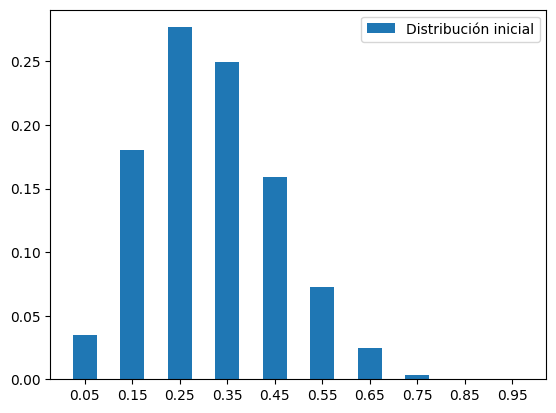

In [ ]:
plt.bar(p, prior, width=0.05,
        tick_label=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
        label="Distribución inicial")
plt.legend();

En nuestro ejemplo, $s=11$ y $f=16$, por lo que la verosimilitud (distribución muestral/sampling distribution) es
$$
f(x_1,\ldots,x_{27}|p) ∝ p^{11} (1-p)^{16}
$$
con $0<p<1$

In [ ]:
def posterior_discrete(p, prior, data):
  """ Distribución posterior para una proporción con modelos discretos.

  Función original:
  pdist de LearnBayes en R (https://rdrr.io/cran/LearnBayes/src/R/pdisc.R)

  :param p: Arreglo de valores de la proporción.
  :param prior: Arreglo con las probabilidades iniciales para las proporciones.
  :param data: Arreglo de datos (éxitos / fracasos de los ensayos bernoulli).
  :return: Arreglo con la distribución posterior.
  """
  assert len(p) == len(prior)

  like = np.power(p, data[0]) * np.power(1-p, data[1])
  post = like * prior
  post /= np.sum(post)

  return post

In [ ]:
data = np.array([11, 16])
post = posterior_discrete(p, prior, data)

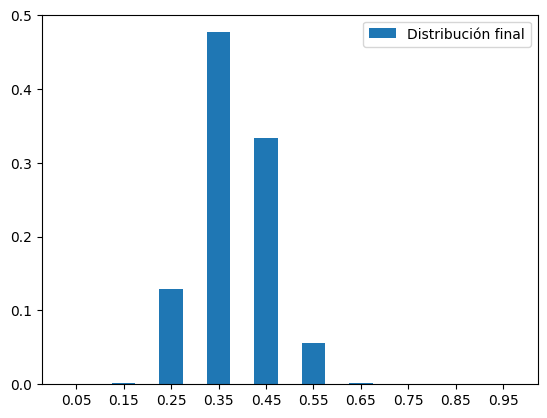

In [ ]:
plt.bar(p, post, width=0.05,
        tick_label=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
        label="Distribución final")
plt.legend();

In [ ]:
table = pd.DataFrame({"p": p,
                      "Inicial": prior,
                      "Final": post})

In [ ]:
table

,p,Inicial,Final
0,0.05,0.034602,1.451714e-08
1,0.15,0.179931,2.256022e-03
2,0.25,0.276817,1.291349e-01
3,0.35,0.249135,4.767910e-01
4,0.45,0.159170,3.338350e-01
5,0.55,0.072664,5.587820e-02
6,0.65,0.024221,2.098297e-03
7,0.75,0.003460,6.642742e-06
8,0.85,0.000000,0.000000e+00
9,0.95,0.000000,0.000000e+00


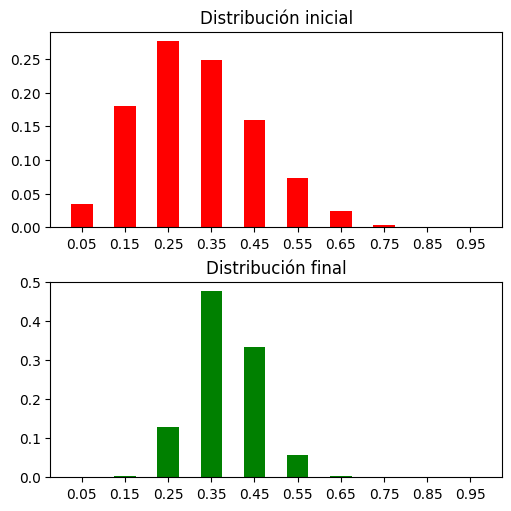

In [ ]:
fig, axs = plt.subplots(2, 1, layout='constrained', figsize=(5, 5))
_ = axs[0].bar(p, prior, width=0.05,
               tick_label=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
               color="red")
_ = axs[0].set_title("Distribución inicial")
_ = axs[1].bar(p, post, width=0.05,
               tick_label=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
               color="green")
_ = axs[1].set_title("Distribución final")

Nótese que luego de actualizar la densidad, el conjunto de valores $\{0.25, 0.35, 0.45\}$ tienen una probabilidad posterior de $0.940$

In [ ]:
np.sum(post)

1.0000000000000002

In [ ]:
p[2:5]

array([0.25, 0.35, 0.45])

In [ ]:
np.sum(post[2:5])

0.9397608225148018

*Inicial beta*

Como la proporción $p$ es un parámetro continuo en $(0,1)$ es más realista asignarle una distribución inicial, $\pi(p)$ con soporte $(0,1)$.

Podemos asignar una distribución inicial beta para $p$

$$
\begin{align*}
\pi(p) &= \frac{1}{B(a,b)} p^{a-1} (1-p)^{b-1} \mathbf{1}_{(0,1)}(p) \\
       &\propto p^{a-1} (1-p)^{b-1} \mathbf{1}_{(0,1)}(p)
\end{align*}
$$

Los hiperparámetros $a$ y $b$ se eligen de tal manera que reflejen las creencias iniciales (a priori) sobre los posibles valores de $p$.

Según lo visto de los artículos, es poco probable que la proporción $p$ sea mayor que $0.5$.

Podemos, por ejemplo, decir que $\mathbb{P}(p\leq 0.5) = 0.9$.
Además también tenemos motivos para creer que la mediana está cercana a $0.3$.
Eso podemos escribirlo como $\mathbb{P}(p\leq 0.3) = \mathbb{P}(p\geq 0.3) = 0.5$.

Lo anterior se resume a que el cuantil $0.5$ (la mediana) es $0.3$, y el cuantil $0.9$ es $0.5$. __Necesitamos una forma de encontrar $a$ y $b$ de una distribución beta, conociendo dos de sus cuantiles.__ [Do two quantiles of a beta distribution determine its parameters?](https://stats.stackexchange.com/questions/235711/do-two-quantiles-of-a-beta-distribution-determine-its-parameters).


In [ ]:
def _beta_select_equation(params, p1, x1, p2, x2):
    return betainc(*params, [x1, x2]) - [p1, p2]


def beta_select(p1, x1, p2, x2):
    """ Implementación de beta.select de LearnBayes.
    https://stackoverflow.com/questions/73870683/how-to-find-the-shape-parameters-of-a-beta-density-that-matches-two-quantiles-in

    :param p1: orden del primer cuantil.
    :param x1: primer cuantil.
    :param p2: orden del segundo cuantil.
    :param x2: segundo cuantil.
    """
    params, info, status, mesg = fsolve(_beta_select_equation, [1, 1],
                                        args=(p1, x1, p2, x2), xtol=1e-12,
                                        full_output=True)
    if status != 1:
        raise RuntimeError(f'fsolve failed: {mesg}')
    return params

In [ ]:
a, b = beta_select(0.5, 0.3, 0.9, 0.5)

In [ ]:
a, b

(3.2637446805117913, 7.185125237062734)

Es decir,
$$
\begin{align*}
\pi(p) &\propto p^{3.26-1} (1-p)^{7.18-1} \mathbf{1}_{(0,1)}(p)
\end{align*}
$$

Luego,
$$
\begin{align*}
    f(p|x_1,\ldots,x_{27}) &\propto p^{s}(1-p)^{f} p^{3.26-1} (1-p)^{7.18-1} \mathbf{1}_{(0,1)}(p) \\
    &= p^{a+s-1} (1-p)^{b+f-1}
\end{align*}
$$
con $a=3.26, b=7.18, s=11, f=16$.

Obs: Este es un ejemplo de una distribución inicial conjugada.

_Def (Familia conjugada):_ Se dice que una familia $\mathcal{F}$ de distribuciones de probabilidad definidas en $\Theta$ es conjugada (o cerrada bajo muestreo) para una función de verosimilitud $f(x|\theta)$, si para cada inicial $\pi(\theta) \in \mathcal{F}$, la posterior $\pi(\theta|x)$ también está en $\mathcal{F}$.


En nuestro caso, $p \sim \mathcal{Beta}(3.26,7.18)$, $x|p \sim \mathcal{Bin}(27,p)$ y $p|x \sim \mathcal{Beta}(14.26, 23.18)$.


Usando la pérdida/utilidad cuadrática podemos dar un estimador puntual bayesiano para $p$,

$$
\hat{p}_{\text{Bayes}} = \mathbb{E}_{\theta}(\theta|x) = \frac{14.26}{14.26+23.18} = 0.38
$$

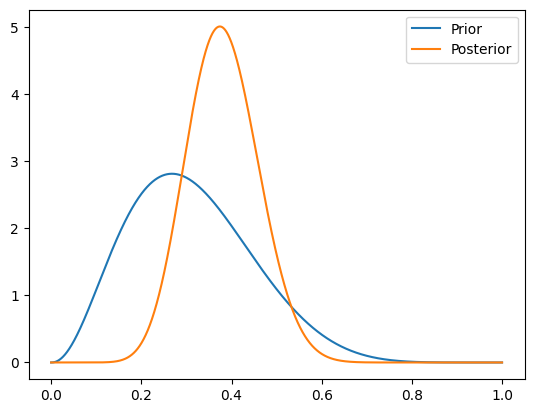

In [ ]:
dom = np.linspace(0, 1, 10000)
a_, b_ = 14.26, 23.18

prior_beta = stats.beta.pdf(dom, a, b)
posterior_beta = stats.beta.pdf(dom, a_, b_)

_ = plt.plot(dom, prior_beta, label="Prior")
_ = plt.plot(dom, posterior_beta, label="Posterior")
_ = plt.legend()